In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# CSV 파일 불러오기
file_path = "아파트_매매_실거래_평균가격_20250707161840.csv"
df = pd.read_csv(file_path,encoding='cp949')

# 데이터 상위 확인
df.head()


,행정구역별(1),행정구역별(2),2024.01,2024.02,2024.03,2024.04,2024.05,2024.06,2024.07,2024.08,2024.09,2024.1,2024.11,2024.12,2025.01,2025.02,2025.03,2025.04
0,전국,소계,500.1,506.7,545.4,575.8,609.4,704.7,723.8,661.5,560.2,557.8,569.3,568.7,598.8,692.7,749.6,608.3
1,수도권,소계,750.6,765.8,819.1,853.9,894.8,994.0,997.1,929.7,840.6,852.1,895.2,908.0,948.9,1085.9,1116.8,893.0
2,지방,소계,334.1,325.8,335.5,338.8,343.7,358.4,369.7,368.9,354.4,356.1,350.8,347.0,344.6,339.5,353.9,370.2
3,서울,서울,1371.0,1400.4,1442.0,1473.5,1527.4,1603.2,1566.9,1530.1,1499.2,1506.0,1581.1,1590.4,1644.2,1847.4,1785.2,1463.8
4,서울,도심권,1713.2,1709.5,1794.6,1751.6,1807.7,1856.1,1858.9,1827.2,1802.7,1860.4,1892.5,1788.9,1956.6,2022.0,2042.6,1692.3


In [6]:
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
plt.rcParams['font.family']='Malgun Gothic'# 맥 AppleGothic
plt.rcParams['axes.unicode_minus']=False

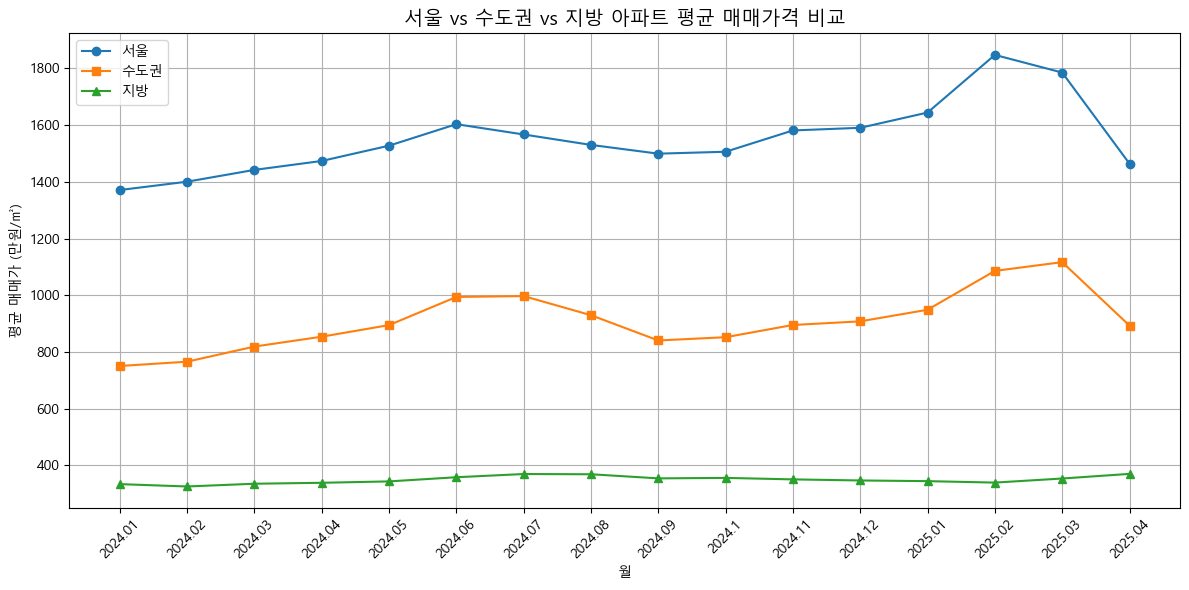

In [7]:
# 괄호 오류 수정 후 다시 실행

# 서울, 수도권, 지방 각각의 데이터 추출
seoul = df[(df["행정구역별(1)"] == "서울") & (df["행정구역별(2)"] == "서울")].drop(columns=["행정구역별(1)", "행정구역별(2)"]).T
capital = df[(df["행정구역별(1)"] == "수도권") & (df["행정구역별(2)"] == "소계")].drop(columns=["행정구역별(1)", "행정구역별(2)"]).T
region = df[(df["행정구역별(1)"] == "지방") & (df["행정구역별(2)"] == "소계")].drop(columns=["행정구역별(1)", "행정구역별(2)"]).T

# 컬럼명 지정 및 index 리셋
seoul.columns = ["서울"]
capital.columns = ["수도권"]
region.columns = ["지방"]

# 병합
compare_df = pd.concat([seoul, capital, region], axis=1)
compare_df.index.name = "월"
compare_df.reset_index(inplace=True)

# 시각화
plt.figure(figsize=(12, 6))
plt.plot(compare_df["월"], compare_df["서울"], marker="o", label="서울")
plt.plot(compare_df["월"], compare_df["수도권"], marker="s", label="수도권")
plt.plot(compare_df["월"], compare_df["지방"], marker="^", label="지방")
plt.title("서울 vs 수도권 vs 지방 아파트 평균 매매가격 비교", fontsize=14)
plt.xlabel("월")
plt.ylabel("평균 매매가 (만원/㎡)")
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

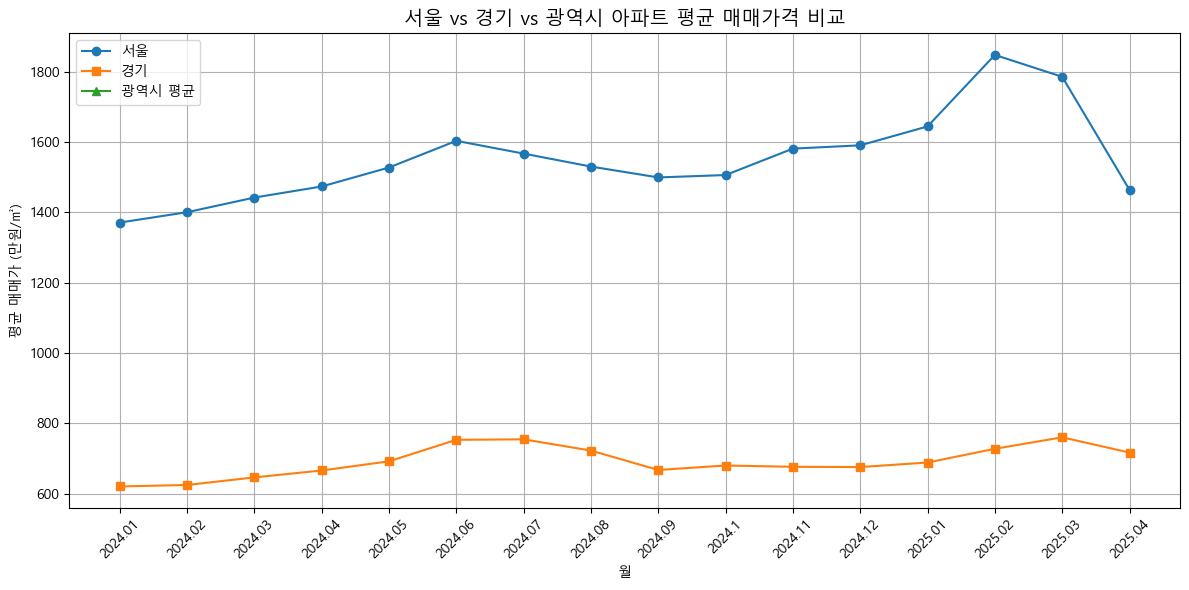

In [8]:
# 광역시: 각 도시별 행 추출 후 평균 계산
metro_cities = ["부산", "대구", "인천", "광주", "대전", "울산"]
metro_rows = df[df["행정구역별(1)"].isin(metro_cities) & (df["행정구역별(1)"] == df["행정구역별(2)"])]
metro_data = metro_rows.drop(columns=["행정구역별(1)", "행정구역별(2)"]).astype(float)
metro_avg = pd.DataFrame(metro_data.mean(axis=0), columns=["광역시"])

# 서울
seoul = df[(df["행정구역별(1)"] == "서울") & (df["행정구역별(2)"] == "서울")].drop(columns=["행정구역별(1)", "행정구역별(2)"]).T
seoul.columns = ["서울"]

# 경기
gyeonggi = df[(df["행정구역별(1)"] == "도") & (df["행정구역별(2)"] == "경기")].drop(columns=["행정구역별(1)", "행정구역별(2)"]).T
gyeonggi.columns = ["경기"]

# 병합
compare_region = pd.concat([seoul, gyeonggi, metro_avg], axis=1)
compare_region.index.name = "월"
compare_region.reset_index(inplace=True)

# 시각화
plt.figure(figsize=(12, 6))
plt.plot(compare_region["월"], compare_region["서울"], marker="o", label="서울")
plt.plot(compare_region["월"], compare_region["경기"], marker="s", label="경기")
plt.plot(compare_region["월"], compare_region["광역시"], marker="^", label="광역시 평균")
plt.title("서울 vs 경기 vs 광역시 아파트 평균 매매가격 비교", fontsize=14)
plt.xlabel("월")
plt.ylabel("평균 매매가 (만원/㎡)")
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

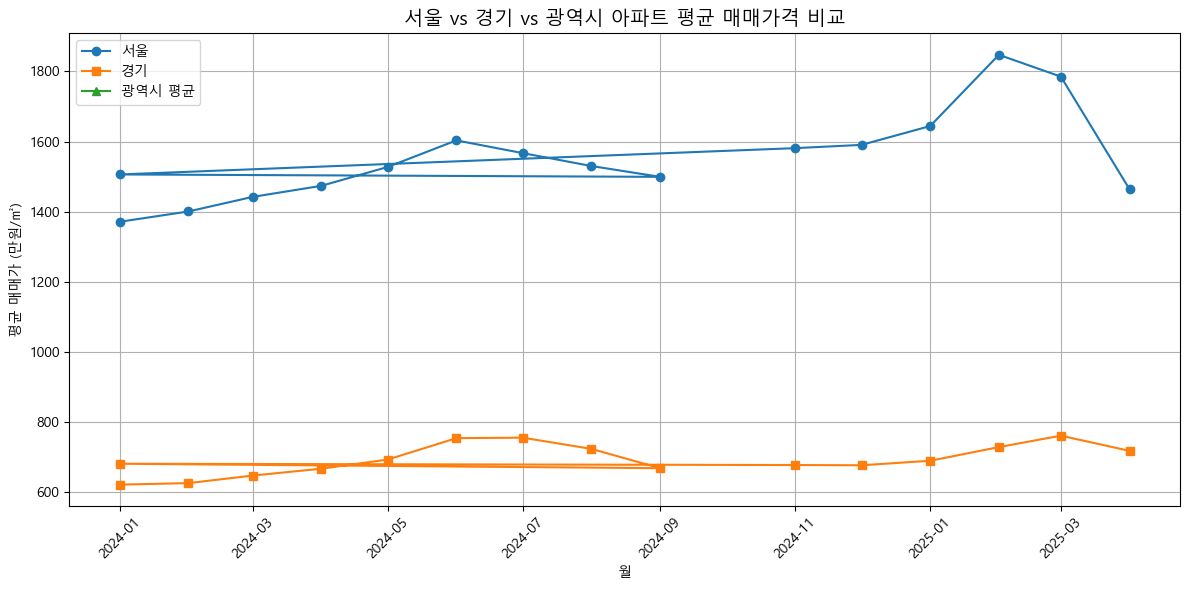

In [9]:
# 1. 6개 광역시 개별 행 추출
metro_cities = ["부산", "대구", "인천", "광주", "대전", "울산"]
metro_rows = df[df["행정구역별(1)"].isin(metro_cities) & (df["행정구역별(1)"] == df["행정구역별(2)"])]

# 2. 월별 평균 계산
metro_data = metro_rows.drop(columns=["행정구역별(1)", "행정구역별(2)"]).astype(float)
metro_avg_fixed = pd.DataFrame(metro_data.groupby(level=0).mean().mean(axis=0), columns=["광역시"])

# 3. 서울
seoul = df[(df["행정구역별(1)"] == "서울") & (df["행정구역별(2)"] == "서울")].drop(columns=["행정구역별(1)", "행정구역별(2)"]).T
seoul.columns = ["서울"]

# 4. 경기
gyeonggi = df[(df["행정구역별(1)"] == "도") & (df["행정구역별(2)"] == "경기")].drop(columns=["행정구역별(1)", "행정구역별(2)"]).T
gyeonggi.columns = ["경기"]

# 5. 병합
compare_fixed = pd.concat([seoul, gyeonggi, metro_avg_fixed], axis=1)
compare_fixed.index.name = "월"
compare_fixed.reset_index(inplace=True)
compare_fixed["월"] = pd.to_datetime(compare_fixed["월"], format="%Y.%m", errors="coerce")

# 시각화
plt.figure(figsize=(12, 6))
plt.plot(compare_fixed["월"], compare_fixed["서울"], marker="o", label="서울")
plt.plot(compare_fixed["월"], compare_fixed["경기"], marker="s", label="경기")
plt.plot(compare_fixed["월"], compare_fixed["광역시"], marker="^", label="광역시 평균")
plt.title("서울 vs 경기 vs 광역시 아파트 평균 매매가격 비교", fontsize=14)
plt.xlabel("월")
plt.ylabel("평균 매매가 (만원/㎡)")
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

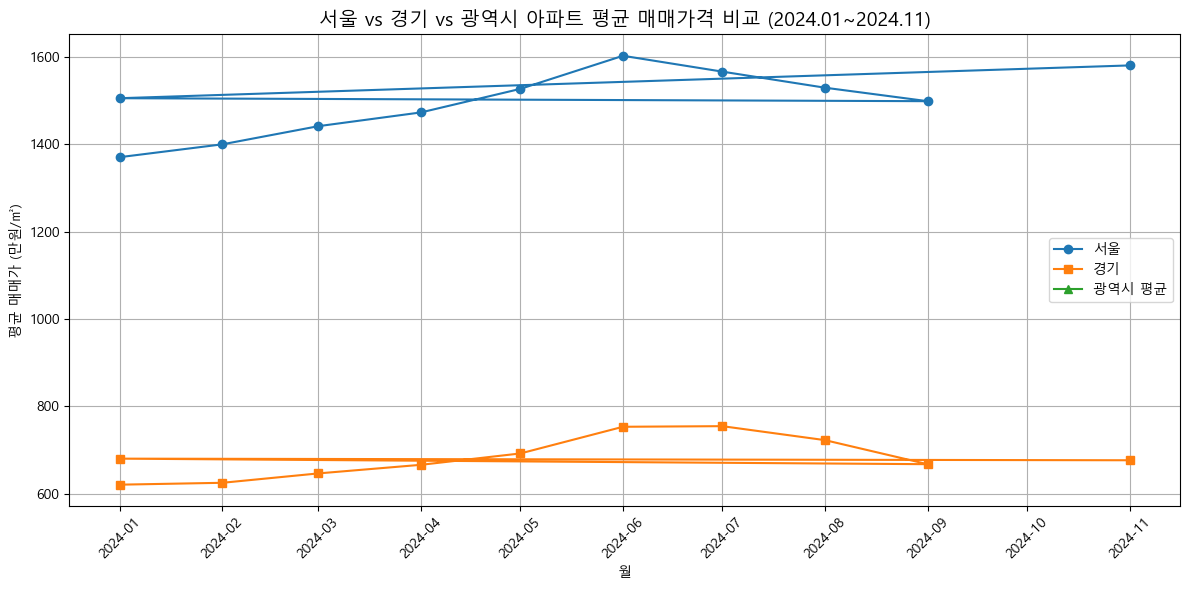

In [10]:
# 2024년 11월 이전 데이터까지만 필터링
cutoff_date = pd.to_datetime("2024-11-30")
compare_limited = compare_fixed[compare_fixed["월"] <= cutoff_date]

# 다시 그래프 시각화
plt.figure(figsize=(12, 6))
plt.plot(compare_limited["월"], compare_limited["서울"], marker="o", label="서울")
plt.plot(compare_limited["월"], compare_limited["경기"], marker="s", label="경기")
plt.plot(compare_limited["월"], compare_limited["광역시"], marker="^", label="광역시 평균")
plt.title("서울 vs 경기 vs 광역시 아파트 평균 매매가격 비교 (2024.01~2024.11)", fontsize=14)
plt.xlabel("월")
plt.ylabel("평균 매매가 (만원/㎡)")
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [12]:
# 광역시 6개 도시 이름
metro_cities = ["부산", "대구", "인천", "광주", "대전", "울산"]

# 해당 도시들의 데이터 추출
metro_rows = df[df["행정구역별(1)"].isin(metro_cities) & (df["행정구역별(1)"] == df["행정구역별(2)"])]

# 월별 평균 계산 (transpose하여 월이 행 인덱스가 되도록)
metro_data = metro_rows.drop(columns=["행정구역별(1)", "행정구역별(2)"])
metro_data_t = metro_data.T
metro_data_t.index.name = "월"
metro_avg_by_month = metro_data_t.astype(float).mean(axis=1).reset_index()
metro_avg_by_month.columns = ["월", "광역시 평균"]
metro_avg_by_month["월"] = pd.to_datetime(metro_avg_by_month["월"], format="%Y.%m", errors="coerce")

# 서울 & 경기 재정의
seoul = df[(df["행정구역별(1)"] == "서울") & (df["행정구역별(2)"] == "서울")].drop(columns=["행정구역별(1)", "행정구역별(2)"]).T
seoul.columns = ["서울"]
seoul.index.name = "월"
seoul = seoul.reset_index()
seoul["월"] = pd.to_datetime(seoul["월"], format="%Y.%m", errors="coerce")

gyeonggi = df[(df["행정구역별(1)"] == "도") & (df["행정구역별(2)"] == "경기")].drop(columns=["행정구역별(1)", "행정구역별(2)"]).T
gyeonggi.columns = ["경기"]
gyeonggi.index.name = "월"
gyeonggi = gyeonggi.reset_index()
gyeonggi["월"] = pd.to_datetime(gyeonggi["월"], format="%Y.%m", errors="coerce")

# 병합
compare_final = seoul.merge(gyeonggi, on="월").merge(metro_avg_by_month, on="월")

# 최신 데이터 확인
compare_final.tail()


,월,서울,경기,광역시 평균
17,2024-12-01,1590.4,676.1,NaN
18,2025-01-01,1644.2,689.0,NaN
19,2025-02-01,1847.4,728.0,NaN
20,2025-03-01,1785.2,760.6,NaN
21,2025-04-01,1463.8,717.3,NaN


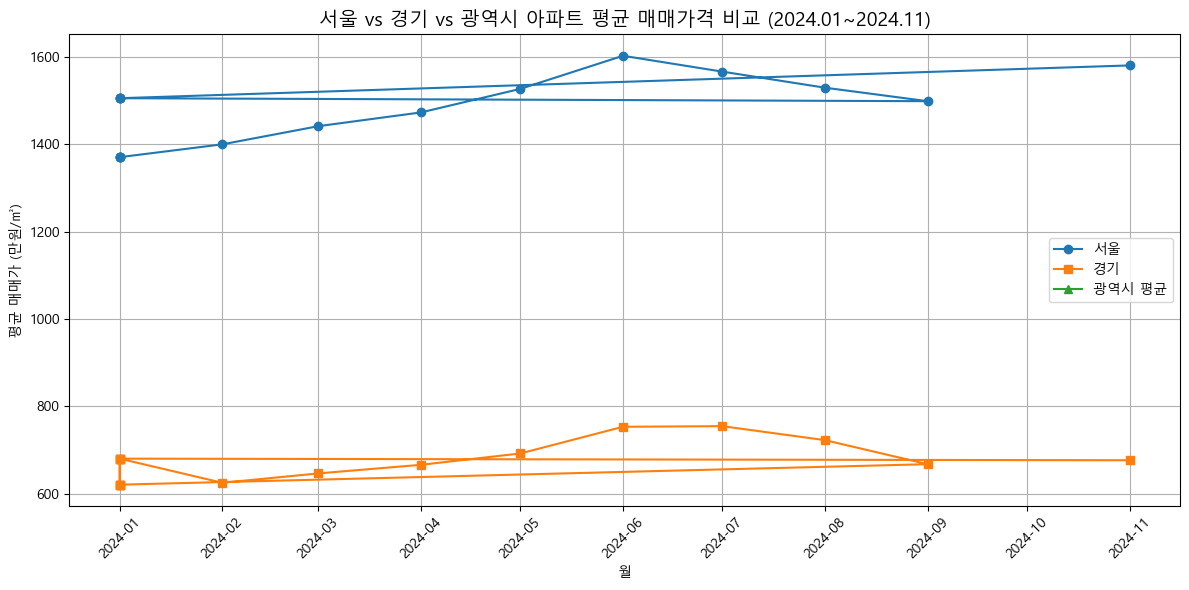

In [13]:
# 2024년 11월까지만 필터링하여 그래프 그리기
compare_final_limited = compare_final[compare_final["월"] <= pd.to_datetime("2024-11-01")]

# 시각화
plt.figure(figsize=(12, 6))
plt.plot(compare_final_limited["월"], compare_final_limited["서울"], marker="o", label="서울")
plt.plot(compare_final_limited["월"], compare_final_limited["경기"], marker="s", label="경기")
plt.plot(compare_final_limited["월"], compare_final_limited["광역시 평균"], marker="^", label="광역시 평균")
plt.title("서울 vs 경기 vs 광역시 아파트 평균 매매가격 비교 (2024.01~2024.11)", fontsize=14)
plt.xlabel("월")
plt.ylabel("평균 매매가 (만원/㎡)")
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()